In [1]:
#All libraries
import pandas as pd
import re
import glob
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [25]:
#read our file
df = pd.read_csv("StateNames.csv") 
df.head(10)

,Id,Name,Year,Gender,State,Count
0,1,Mary,1910,F,AK,14
1,2,Annie,1910,F,AK,12
2,3,Anna,1910,F,AK,10
3,4,Margaret,1910,F,AK,8
4,5,Helen,1910,F,AK,7
5,6,Elsie,1910,F,AK,6
6,7,Lucy,1910,F,AK,6
7,8,Dorothy,1910,F,AK,5
8,9,Mary,1911,F,AK,12
9,10,Margaret,1911,F,AK,7


# 1 Task

In [26]:
# I decided to divide data for 1 task by period of time

formatted_df1 = df[df.Year.ge(1990)]

formatted_df2 = df[df.Year.le(1990)]

In [27]:
# Working with first period
# Period after 1990
# Selecting 
formatted_df1 = formatted_df1[['Name', 'State', 'Count']]
formatted_df1 = formatted_df1.groupby(['Name','State'], as_index=False).aggregate({'Count':'sum'})
formatted_df1 = formatted_df1.loc[formatted_df1.groupby('State')['Count'].idxmax()]
formatted_df1.head(10)

,Name,State,Count
149393,Michael,AK,1916
202408,William,AL,14629
87269,Jacob,AR,6513
149396,Michael,AZ,14456
51692,Daniel,CA,103620
149398,Michael,CO,10313
149399,Michael,CT,12964
149400,Michael,DC,3009
149401,Michael,DE,2816
149402,Michael,FL,45245


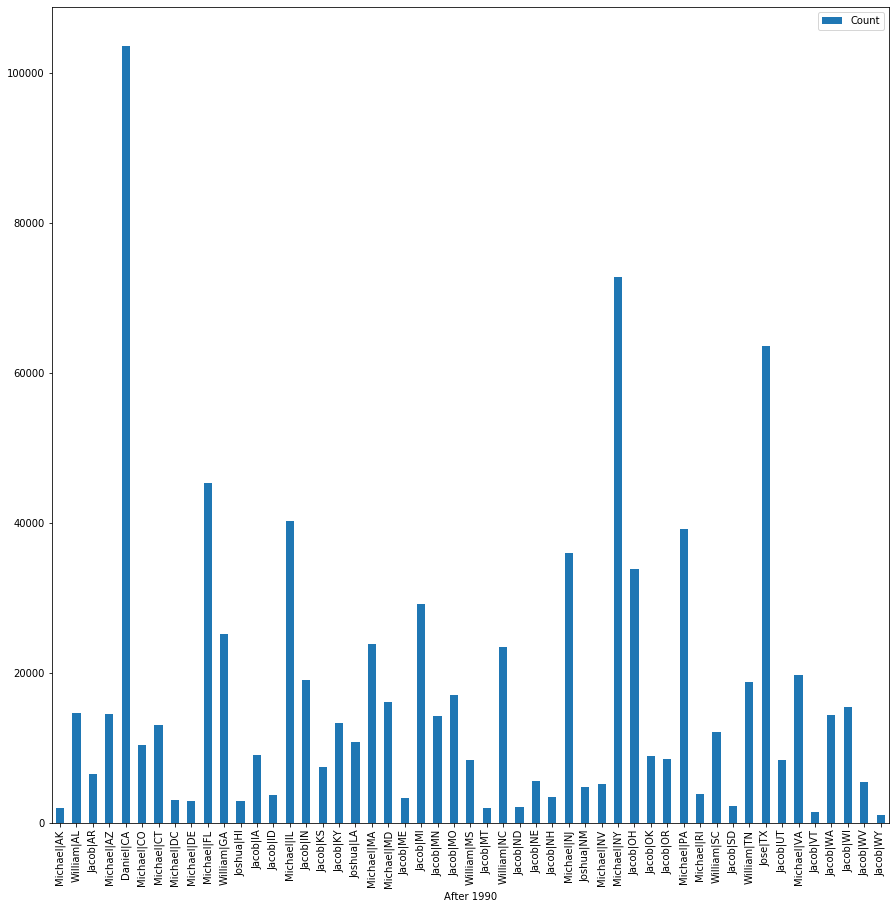

In [28]:
# Creating new column with name and state
# New df with two needed columns
# Plot
formatted_df1["Name State"] = formatted_df1["Name"] + "|"+ formatted_df1["State"]
formatted_df1 = formatted_df1[['Name State','Count']]
formatted_df1.head(10)
formatted_df1.set_index("Name State",drop=True,inplace=True)
p=formatted_df1.plot.bar(figsize = (15,15))
p.set_xlabel("After 1990")
p

In [29]:
# Working with first period
# Period before 1990
# Selecting 
formatted_df2 = formatted_df2[['Name', 'State', 'Count']]
formatted_df2 = formatted_df2.groupby(['Name','State'], as_index=False).aggregate({'Count':'sum'})
formatted_df2 = formatted_df2.loc[formatted_df2.groupby('State')['Count'].idxmax()]
formatted_df2.head(10)

,Name,State,Count
120370,Michael,AK,6355
74168,James,AL,146670
74169,James,AR,80151
120373,Michael,AZ,31490
120374,Michael,CA,338592
139713,Robert,CO,43518
82137,John,CT,72793
82138,John,DC,31943
82139,John,DE,13446
74176,James,FL,115859


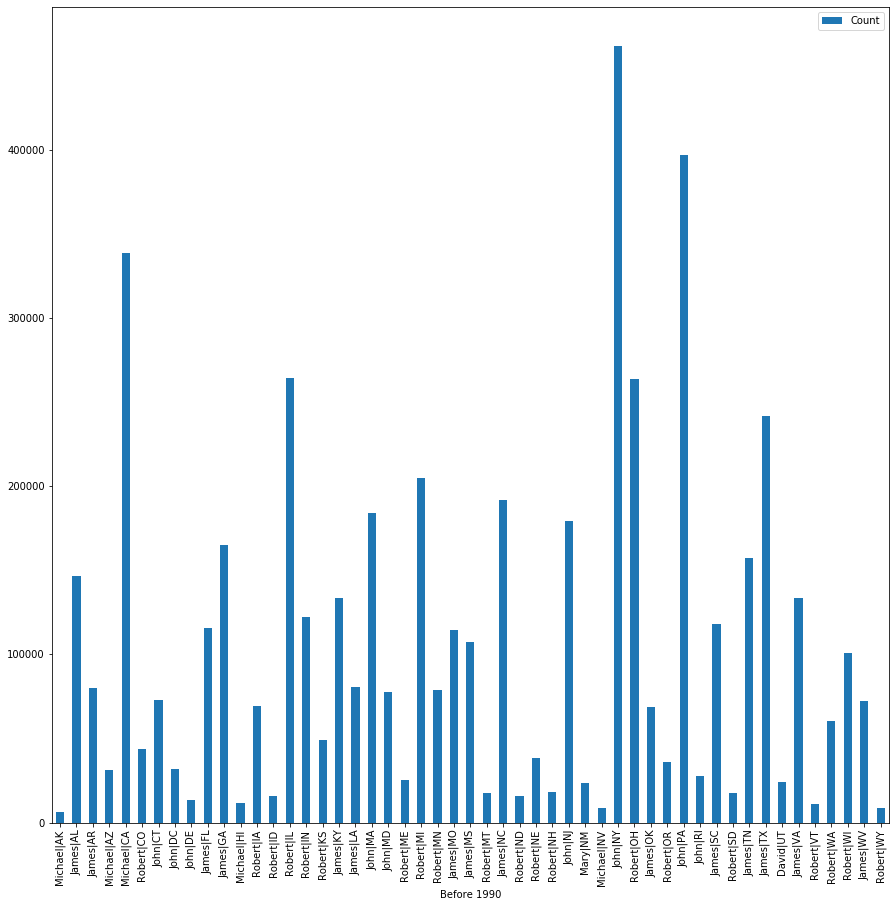

In [30]:
# Creating new column with name and state
# New df with two needed columns
# Plot
formatted_df2["Name State"] = formatted_df2["Name"] + "|"+ formatted_df2["State"]
formatted_df2 = formatted_df2[['Name State','Count']]
formatted_df2.head(10)
formatted_df2.set_index("Name State",drop=True,inplace=True)
p1=formatted_df2.plot.bar(figsize = (15,15))
p1.set_xlabel("Before 1990")
p1

# 2 Task

In [95]:
# I decided to divide data for 2 task by sex and filter time period
df1 = df[df['Year'].between(1990, 2000)]

formatted_df1 = df1.loc[df1['Gender'] == 'F']

formatted_df2 = df1.loc[df1['Gender'] == 'M']

In [96]:
# Filtering...
# Preparing for heatmap
# Female
array = ['FL', 'AK', 'WY']
formatted_df1 = formatted_df1.loc[df['State'].isin(array)]
array = ['Ashley', 'Mary', 'Helen']
formatted_df1 = formatted_df1.loc[formatted_df1['Name'].isin(array)]
formatted_df1 = formatted_df1[['Name', 'State','Count']]
formatted_df1 = formatted_df1.groupby(['State','Name']).sum()
formatted_df1=formatted_df1.unstack(level=0)
formatted_df1.head(10)

Count                
State      AK       FL     WY
Name                         
Ashley  705.0  17924.0  485.0
Helen    33.0    367.0    NaN
Mary    252.0   3159.0   83.0

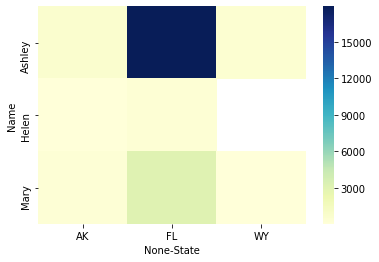

In [97]:
# Female
x_axis_labels = ["AK", "FL", "WY"]
sns.heatmap(formatted_df1, cmap="YlGnBu", xticklabels=x_axis_labels)


In [99]:
# Filtering...
# Preparing for heatmap
# Male
array = ['FL', 'AK', 'WY']
formatted_df2 = formatted_df2.loc[df['State'].isin(array)]
array = ['James', 'Ryan', 'Nathan']
formatted_df2 = formatted_df2.loc[df['Name'].isin(array)]
formatted_df2 = formatted_df2[['Name', 'State','Count']]
formatted_df2 = formatted_df2.groupby(['State','Name']).sum()
formatted_df2=formatted_df2.unstack(level=0)
formatted_df2.head(10)

Count            
State     AK     FL   WY
Name                    
James    792  13222  366
Nathan   354   3683  236
Ryan     653  11870  388

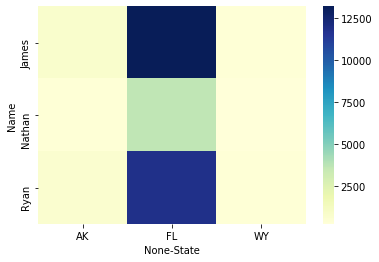

In [101]:
# Male

sns.heatmap(formatted_df2, cmap="YlGnBu", xticklabels=x_axis_labels)

# 3 Task

In [131]:
# Filter by time period, states and names
formatted_df1 = df[df.Year.ge(1990)]
array = ['FL', 'AK', 'WY']
formatted_df1 = formatted_df1.loc[df['State'].isin(array)]
array = ['Jessica', 'Mary', 'Nathan']
formatted_df1 = formatted_df1.loc[df['Name'].isin(array)]

In [132]:
# Keeping only needed columns
formatted_df1 = formatted_df1[['Name', 'Year', 'State','Count']]

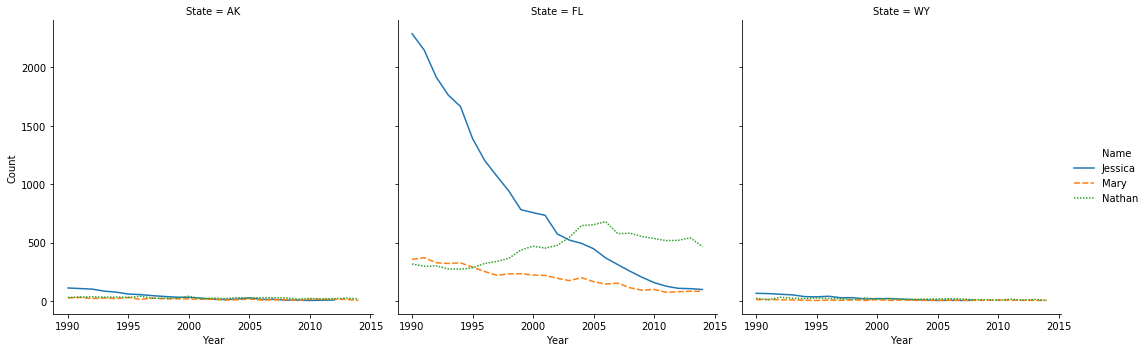

In [133]:
sns.relplot(x="Year", y="Count", hue="Name", style="Name",
            col="State", col_wrap=3,
            kind="line", data=formatted_df1);